# LABORATORY SESSION - WEEK 11

In [13]:
# imports 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 & 2 

Implement simulation of SIS model on BA and ER graph. Compare results with our analytical findings.

### Solution 

In [14]:
# Generate a Barabási-Albert (BA) network
def generate_ba_network(N, m):
    """
    Generate a Barabási-Albert (BA) network.
    Args:
        N (int): Number of nodes.
        m (int): Number of edges to attach from a new node to existing nodes.
    Returns:
        G: A BA network graph.
    """
    G = nx.barabasi_albert_graph(N, m)
    return G

# Generate an Erdős-Rényi (ER) network
def generate_er_network(N, p):
    """
    Generate an Erdős-Rényi (ER) network.
    Args:
        N (int): Number of nodes.
        p (float): Probability of edge creation.
    Returns:
        G: An ER network graph.
    """
    G = nx.erdos_renyi_graph(N, p)
    return G

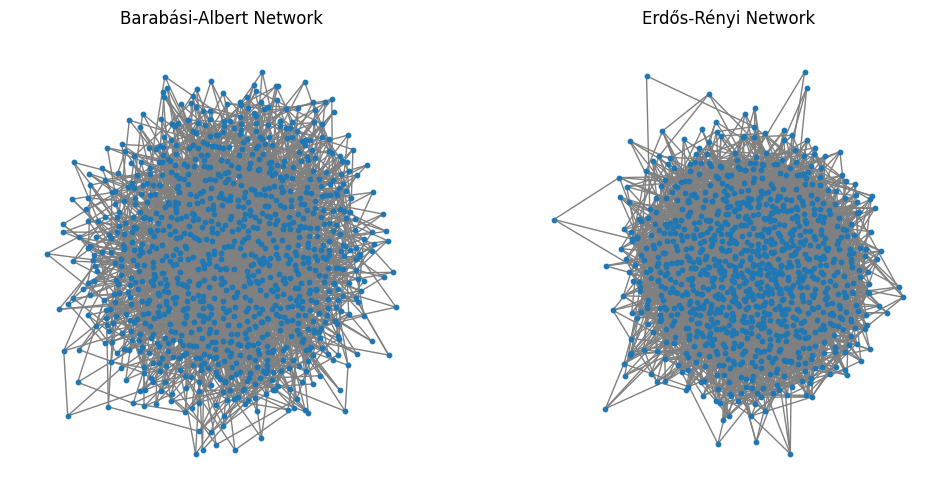

In [15]:
# Parameters for the networks
N = 1000  # Number of nodes
m = 3     # Number of edges per new node for BA
p = .01  # Probability of edge creation for ER

# Generate networks
ba_network = generate_ba_network(N, m)
er_network = generate_er_network(N, p)

# Visualize the networks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(ba_network, node_size=10, edge_color='gray', with_labels=False)
plt.title("Barabási-Albert Network")
plt.subplot(1, 2, 2)
nx.draw(er_network, node_size=10, edge_color='gray', with_labels=False)
plt.title("Erdős-Rényi Network")
plt.show()

In [16]:
import numpy as np
import networkx as nx

def simulate_sis_with_threshold(G, beta, mu, initial_infected, max_time):
    """
    Simulate the SIS model on a network and compute the epidemic threshold.
    
    Args:
        G (NetworkX graph): The graph representing the network.
        beta (float): Infection rate.
        mu (float): Recovery rate.
        initial_infected (float): Fraction of initially infected nodes.
        max_time (int): Number of time steps to simulate.
    
    Returns:
        infection_density (list): Fraction of infected nodes at each time step.
        epidemic_threshold (float): Theoretical epidemic threshold for the network.
    """
    N = G.number_of_nodes()
    # Initialize states: 1 = infected, 0 = susceptible
    state = np.zeros(N)
    initial_infected_nodes = np.random.choice(N, int(initial_infected * N), replace=False)
    state[initial_infected_nodes] = 1

    infection_density = [np.sum(state) / N]  # Track the fraction of infected nodes

    # Compute theoretical epidemic threshold
    degree_sequence = [d for _, d in G.degree()]
    avg_k = np.mean(degree_sequence)
    avg_k2 = np.mean([k**2 for k in degree_sequence])
    epidemic_threshold = avg_k / avg_k2

    for t in range(max_time):
        new_state = state.copy()
        for node in G.nodes():
            if state[node] == 1:  # Infected node
                # Recover with probability mu
                if np.random.rand() < mu:
                    new_state[node] = 0
            else:  # Susceptible node
                # Get infected by neighbors with probability beta
                neighbors = list(G.neighbors(node))
                infected_neighbors = np.sum(state[neighbors])
                if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                    new_state[node] = 1

        state = new_state
        infection_density.append(np.sum(state) / N)

    return infection_density, epidemic_threshold


Theoretical Epidemic Threshold for BA network: 0.06783235814396517
Theoretical Epidemic Threshold for ER network: 0.0904845195376598


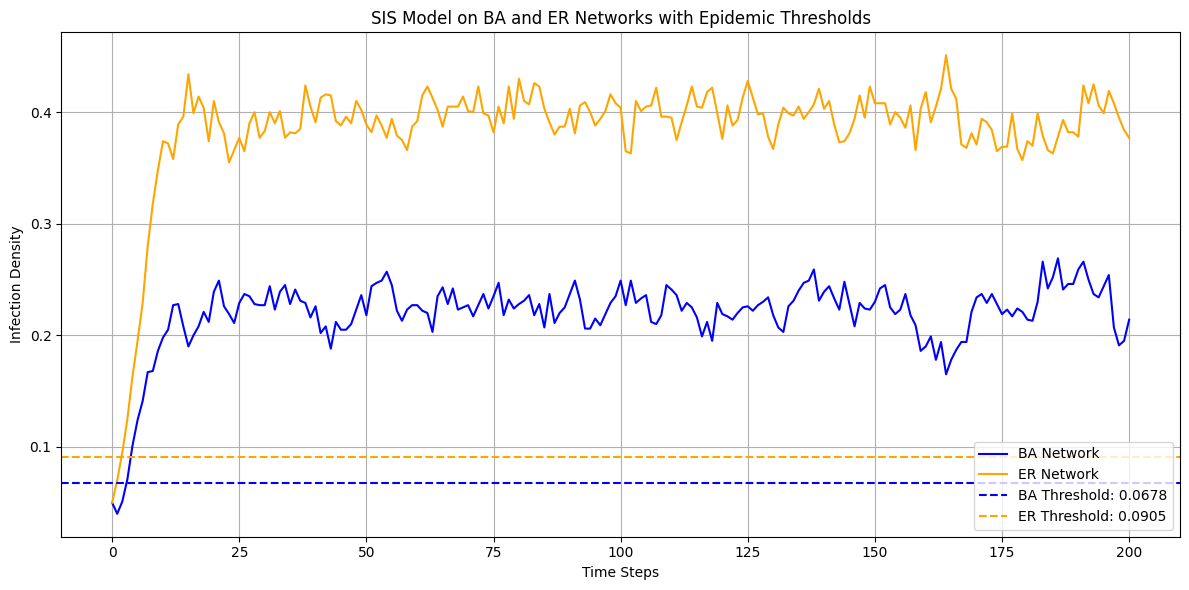

In [19]:
# Set parameters
beta = 0.1
mu = 0.5
initial_infected = 0.05
max_time = 200

# Simulate SIS on BA and ER networks
ba_infection, ba_threshold = simulate_sis_with_threshold(ba_network, beta, mu, initial_infected, max_time)
er_infection, er_threshold = simulate_sis_with_threshold(er_network, beta, mu, initial_infected, max_time)

# Display results
print("Theoretical Epidemic Threshold for BA network:", ba_threshold)
print("Theoretical Epidemic Threshold for ER network:", er_threshold)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ba_infection, label="BA Network", color='blue')
plt.plot(er_infection, label="ER Network", color='orange')

# Add epidemic thresholds as horizontal lines
plt.axhline(ba_threshold, color='blue', linestyle='--', label=f"BA Threshold: {ba_threshold:.4f}")
plt.axhline(er_threshold, color='orange', linestyle='--', label=f"ER Threshold: {er_threshold:.4f}")

# Customize plot
plt.xlabel("Time Steps")
plt.ylabel("Infection Density")
plt.title("SIS Model on BA and ER Networks with Epidemic Thresholds")
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()


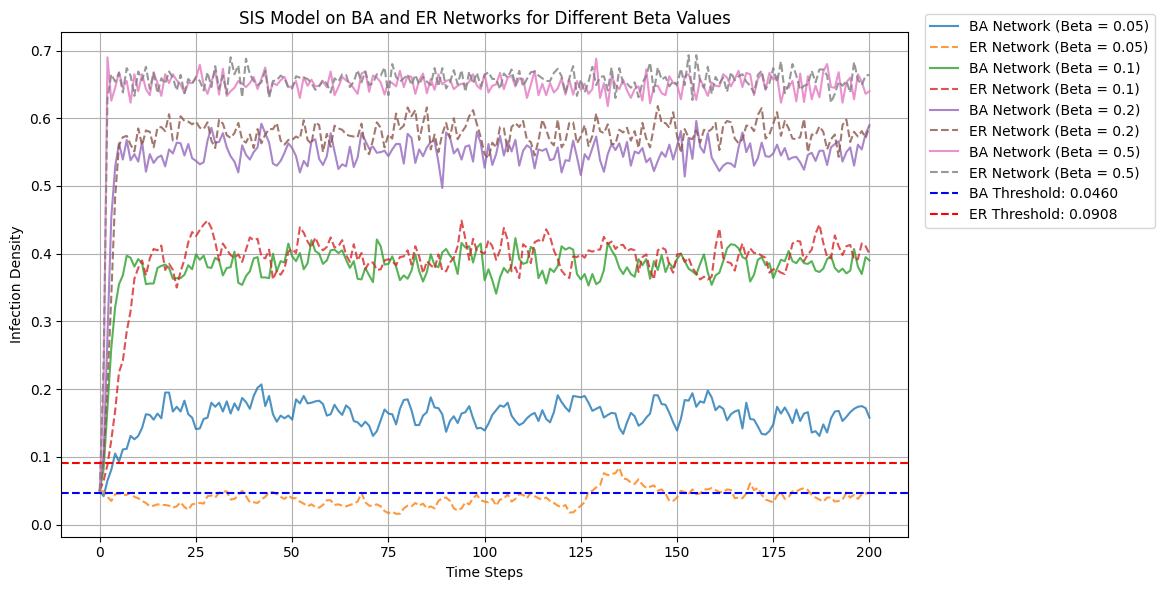

In [23]:
def simulate_sis_with_threshold(G, beta, mu, initial_infected, max_time):
    """
    Simulate the SIS model on a network and compute the epidemic threshold.
    Args:
        G: NetworkX graph.
        beta (float): Infection rate.
        mu (float): Recovery rate.
        initial_infected (float): Fraction of initially infected nodes.
        max_time (int): Number of time steps to simulate.
    Returns:
        infection_density (list): Fraction of infected nodes at each time step.
        threshold (float): Theoretical epidemic threshold.
    """
    N = G.number_of_nodes()
    state = np.zeros(N)
    initial_infected_nodes = np.random.choice(N, int(initial_infected * N), replace=False)
    state[initial_infected_nodes] = 1

    infection_density = [np.sum(state) / N]
    for t in range(max_time):
        new_state = state.copy()
        for node in G.nodes():
            if state[node] == 1:
                if np.random.rand() < mu:
                    new_state[node] = 0
            else:
                neighbors = list(G.neighbors(node))
                infected_neighbors = np.sum(state[neighbors])
                if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                    new_state[node] = 1
        state = new_state
        infection_density.append(np.sum(state) / N)

    degree_sequence = [deg for _, deg in G.degree()]
    k_mean = np.mean(degree_sequence)
    k_squared_mean = np.mean([k**2 for k in degree_sequence])
    threshold = k_mean / k_squared_mean

    return infection_density, threshold

# Generate BA and ER networks
N = 1000  # Number of nodes
m = 5     # Edges per new node (BA network)
p = 0.01  # Connection probability (ER network)
ba_network = nx.barabasi_albert_graph(N, m)
er_network = nx.erdos_renyi_graph(N, p)

# Set parameters
beta_values = [0.05, 0.1, 0.2, 0.5]
mu = 0.5
initial_infected = 0.05
max_time = 200

# Simulate SIS on BA and ER networks for different beta values
results = []
for beta in beta_values:
    ba_infection, ba_threshold = simulate_sis_with_threshold(ba_network, beta, mu, initial_infected, max_time)
    er_infection, er_threshold = simulate_sis_with_threshold(er_network, beta, mu, initial_infected, max_time)
    results.append((beta, ba_infection, ba_threshold, er_infection, er_threshold))

# Plot all results in a single plot
plt.figure(figsize=(12, 6))

for beta, ba_infection, ba_threshold, er_infection, er_threshold in results:
    # Plot infection densities for BA network
    plt.plot(ba_infection, label=f"BA Network (Beta = {beta})", linestyle='-', alpha=0.8)
    # Plot infection densities for ER network
    plt.plot(er_infection, label=f"ER Network (Beta = {beta})", linestyle='--', alpha=0.8)

# Add epidemic thresholds as horizontal lines
plt.axhline(ba_threshold, color='blue', linestyle='--', label=f"BA Threshold: {ba_threshold:.4f}")
plt.axhline(er_threshold, color='red', linestyle='--', label=f"ER Threshold: {er_threshold:.4f}")

# Add labels and legends
plt.xlabel("Time Steps")
plt.ylabel("Infection Density")
plt.title("SIS Model on BA and ER Networks for Different Beta Values")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.05))
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


### Problem 3 

Implement simulation of different than SIS agent-based model. Discuss obtained results. 

### Solution 

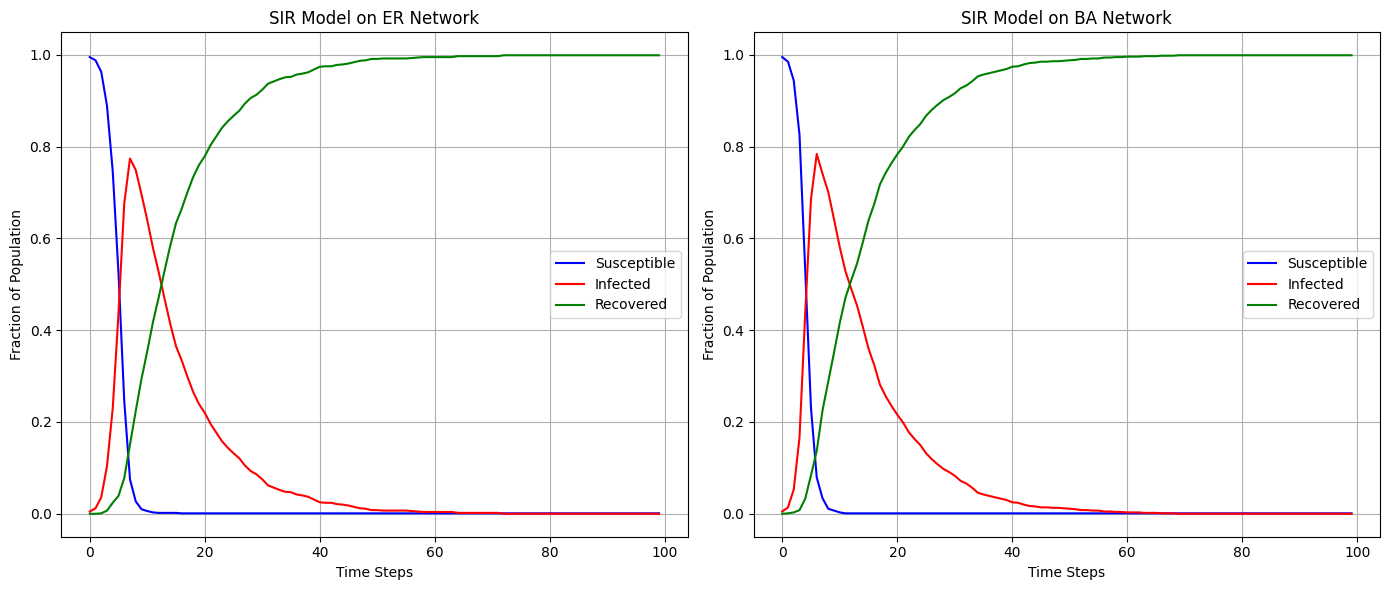

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def simulate_sir(G, beta, gamma, timesteps=100, initial_infected=5):
    """
    Simulate the SIR model on a given network.
    
    Args:
        G: NetworkX graph (ER or BA).
        beta: Infection rate.
        gamma: Recovery rate.
        timesteps: Number of simulation steps.
        initial_infected: Initial number of infected nodes.
    
    Returns:
        susceptible_fraction: List of fractions of susceptible nodes over time.
        infected_fraction: List of fractions of infected nodes over time.
        recovered_fraction: List of fractions of recovered nodes over time.
    """
    N = G.number_of_nodes()
    state = np.zeros(N)  # 0 = Susceptible, 1 = Infected, 2 = Recovered
    infected_nodes = np.random.choice(N, initial_infected, replace=False)
    state[infected_nodes] = 1

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for t in range(timesteps):
        susceptible_fraction.append(np.sum(state == 0) / N)
        infected_fraction.append(np.sum(state == 1) / N)
        recovered_fraction.append(np.sum(state == 2) / N)

        new_state = state.copy()
        infected = np.where(state == 1)[0]

        for node in infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state[neighbor] == 0 and np.random.rand() < beta:
                    new_state[neighbor] = 1
            if np.random.rand() < gamma:
                new_state[node] = 2

        state = new_state

    return susceptible_fraction, infected_fraction, recovered_fraction

# Network parameters
N = 1000  # Number of nodes
p = 0.01  # Connection probability for ER network
m = 5     # Edges per new node for BA network

# Simulation parameters
beta = 0.2
gamma = 0.1
timesteps = 100
initial_infected = 5

# Generate networks
er_network = nx.erdos_renyi_graph(N, p)
ba_network = nx.barabasi_albert_graph(N, m)

# Simulate SIR model on ER and BA networks
er_susceptible, er_infected, er_recovered = simulate_sir(er_network, beta, gamma, timesteps, initial_infected)
ba_susceptible, ba_infected, ba_recovered = simulate_sir(ba_network, beta, gamma, timesteps, initial_infected)

# Plot results
plt.figure(figsize=(14, 6))

# ER network plot
plt.subplot(1, 2, 1)
plt.plot(er_susceptible, label="Susceptible", color='blue')
plt.plot(er_infected, label="Infected", color='red')
plt.plot(er_recovered, label="Recovered", color='green')
plt.title("SIR Model on ER Network")
plt.xlabel("Time Steps")
plt.ylabel("Fraction of Population")
plt.legend()
plt.grid()

# BA network plot
plt.subplot(1, 2, 2)
plt.plot(ba_susceptible, label="Susceptible", color='blue')
plt.plot(ba_infected, label="Infected", color='red')
plt.plot(ba_recovered, label="Recovered", color='green')
plt.title("SIR Model on BA Network")
plt.xlabel("Time Steps")
plt.ylabel("Fraction of Population")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Problem 4 

Modify classical voter model that it takes into account additional effects (e.g. propaganda, agent ideology, etc.). 

### Solution 

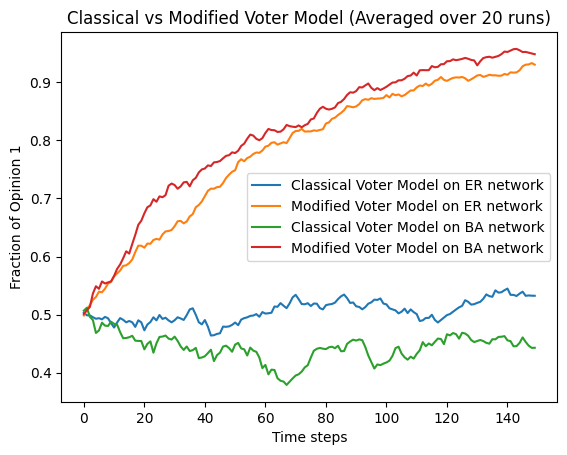

In [27]:
def classical_voter_model(G, timesteps):
    """
    Simulates the classical voter model.
    Returns:
        opinions_over_time: list - Fraction of agents with opinion 1 at each timestep.
    """
    
    opinions = np.random.choice([0, 1], size=N)

    opinions_over_time = []

    for t in range(timesteps):
        opinions_over_time.append(np.mean(opinions))

        for node in range(N):
            neighbor = np.random.choice(list(G.neighbors(node)))
            opinions[node] = opinions[neighbor]

    return opinions_over_time

def modified_voter_model(G, timesteps, propaganda_bias=0.1, ideology_resistance=0.2):
    """
    Simulates the modified voter model with propaganda and ideology effects.

        propaganda_bias: float - Probability of switching to a specific opinion due to propaganda.
        ideology_resistance: float - Probability an agent resists opinion change.
    Returns:
        opinions_over_time: list - Fraction of agents with opinion 1 at each timestep.
    """

    opinions = np.random.choice([0, 1], size=N)

    opinions_over_time = []

    for t in range(timesteps):
        opinions_over_time.append(np.mean(opinions))

        for node in range(N):
            if np.random.rand() < propaganda_bias:
                opinions[node] = 1
            else:
                neighbor = np.random.choice(list(G.neighbors(node)))
                if np.random.rand() > ideology_resistance:
                    opinions[node] = opinions[neighbor]

    return opinions_over_time

def average_voter_model(simulation_func, runs, *args, **kwargs):
    """
    Averages the results of a voter model simulation over multiple runs.
    Args:
        simulation_func: The voter model function to run.
        runs: Number of simulation runs to average.
        *args: Positional arguments for the voter model function.
        **kwargs: Keyword arguments for the voter model function (e.g., timesteps).
    Returns:
        np.array: Averaged results over all runs.
    """
    timesteps = kwargs['timesteps']  # Extract timesteps from kwargs
    results = np.zeros((runs, timesteps))  # Create an array to store results

    for i in range(runs):
        results[i] = simulation_func(*args, **kwargs)  # Run the simulation and store results

    return np.mean(results, axis=0)  # Compute the average


# Parameters
N = 1000
p = 0.01
m = 5
timesteps = 150
propaganda_bias = 0.01
ideology_resistance = 0.3
runs = 20

# Compute graphs
er_network = nx.erdos_renyi_graph(N, p)
ba_network = nx.barabasi_albert_graph(N, m)

# Simulate voter models for ER network
classical_avg_er = average_voter_model(classical_voter_model, runs, G=er_network, timesteps=timesteps)
modified_avg_er = average_voter_model(modified_voter_model, runs, G=er_network, timesteps=timesteps, 
                                   propaganda_bias=propaganda_bias, 
                                   ideology_resistance=ideology_resistance)

# Simulate voter models for BA network
classical_avg_ba = average_voter_model(classical_voter_model, runs, G=ba_network, timesteps=timesteps)
modified_avg_ba = average_voter_model(modified_voter_model, runs, G=ba_network, timesteps=timesteps, 
                                   propaganda_bias=propaganda_bias, 
                                   ideology_resistance=ideology_resistance)


# Plot results
plt.plot(classical_avg_er, label="Classical Voter Model on ER network")
plt.plot(modified_avg_er, label="Modified Voter Model on ER network")
plt.plot(classical_avg_ba, label="Classical Voter Model on BA network")
plt.plot(modified_avg_ba, label="Modified Voter Model on BA network")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Opinion 1")
plt.title("Classical vs Modified Voter Model (Averaged over 20 runs)")
plt.legend()
plt.show()